In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
from datetime import datetime
from datetime import timedelta
from pandas import Series, DataFrame
from sklearn.preprocessing import MinMaxScaler
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import seaborn as sns
from sklearn import datasets

In [2]:
import os
path_dir = "archive2"
file_list = os.listdir(path_dir)

In [3]:
# 모든 ETF를 불러서 저장할 n 개의 데이터 프레임 빈공간 생성
# 밑에서 채워 넣을 것
etfs = [[] for i in range(0,len(file_list))]

In [4]:
# ETF 로드해서 각 자리에 채워넣기
for i in range(0, len(file_list)):
    file_name = path_dir + '/' + file_list[i]
    etfs[i] = pd.read_csv(file_name, delimiter=',')

In [5]:
# info()로 확인한 결과 Date 칼럼이 문자열(string)로 되어있음
# 계산과 순서의 편의성을 위해 문자열을 날짜 형식으로 전환
for i in range(0, len(file_list)):
    etfs[i]['Date']=etfs[i]['Date'].apply(lambda x: pd.to_datetime(str(x), format='%b %d, %Y')).copy()

In [6]:
# 잘 되었나 확인
etfs[0]

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-31,12.38,12.82,12.88,12.29,2.06M,-3.96%
1,2020-08-30,12.89,12.89,12.89,12.89,-,0.00%
2,2020-08-28,12.89,12.85,12.94,12.54,2.07M,2.46%
3,2020-08-27,12.58,12.55,13.15,12.45,3.19M,2.36%
4,2020-08-26,12.29,12.44,12.44,12.11,2.16M,-2.69%
...,...,...,...,...,...,...,...
183,2020-01-08,63.50,65.46,65.46,63.40,117.86K,-1.92%
184,2020-01-07,64.74,64.00,65.46,62.57,100.49K,1.20%
185,2020-01-06,63.97,65.18,65.18,62.76,119.83K,0.41%
186,2020-01-03,63.71,64.08,64.08,61.42,164.12K,3.31%


In [7]:
# 데이터 전처리, JDST ETF는 20에서 1000까지 오르거나 일일 변동이 300에서 1020까지 변동폭이 너무 넓음
# 따라서 이상치, 혹은 투기의 성격이 강하다 판단하고 판단에서 제외하였음

In [1]:
# 덮어씌우면 다시 불러오기 힘드니까 단계별로 각각 새로운 자료를 만들면서 작업
etfs_mod = [[] for i in range(0,len(file_list))]
etfs_temp = [[] for i in range(0,len(file_list))]
etfs_trans = [[] for i in range(0,len(file_list))]

# ETF들의 이름, 나중에 찾기 쉽도록
names = [[] for i in range(0,len(file_list))]

NameError: name 'file_list' is not defined

In [9]:
etfs[1][etfs[1]['Date'] >='2020-04-01']

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-31,284.28,286.20,286.31,283.93,4.07M,-0.84%
1,2020-08-30,286.70,286.70,286.70,286.70,-,0.00%
2,2020-08-28,286.70,286.23,287.45,285.00,2.72M,0.58%
3,2020-08-27,285.04,284.40,286.45,283.83,3.43M,0.57%
4,2020-08-26,283.43,282.58,283.60,281.60,2.65M,0.29%
...,...,...,...,...,...,...,...
117,2020-04-07,226.60,235.46,236.16,226.45,10.86M,0.03%
118,2020-04-06,226.53,218.95,227.91,218.12,10.32M,7.56%
119,2020-04-03,210.60,212.73,214.55,208.69,6.66M,-1.57%
120,2020-04-02,213.96,208.31,214.79,207.18,8.23M,2.19%


In [10]:
# 전처리, 필요없는 칼럼 지우기, 숫자로 전환하기 쉽게 콤마 지우기
for i in range(0, len(file_list)):
#    etfs_mod[i] = etfs[i][etfs[i]['Date'] >='2020-04-01'].copy()
    etfs_mod[i] = etfs[i].copy()
    etfs_mod[i].drop(axis=1, columns= ['Open', 'Price','Low','Vol.','Change %'], inplace=True)
    etfs_mod[i]['High'] = etfs_mod[i]['High'].replace(',','')

In [11]:
# 날짜를 인덱스로 사용하기
for i in range(0, len(file_list)):
    etfs_temp[i] = etfs_mod[i].set_index('Date')

In [12]:
# 각 데이터 프레임에 해당하는 etf의 이름 붙여서 찾기 쉽게 하기
for i in range(0, len(file_list)):
    names[i] = file_list[i].split(' ')[0]
    etfs_temp[i].rename(columns={'High' : file_list[i]}, inplace=True)
    etfs_mod[i].rename(columns={'High' : file_list[i]}, inplace=True)

In [13]:
# 0,1로 스케일하기 위해서 스케일러 준비
scaler = MinMaxScaler()

In [14]:
# 리스케일하기
# 0,1 사이는 보기가 힘드니까 10배 곱해서 0,10 사이로 한다.
for i in range(0, len(file_list)):
    temp = scaler.fit_transform(etfs_temp[i])*10
    etfs_temp[i][file_list[i]] = temp

In [15]:
# 잘 되었나 확인
etfs_temp[8]

,EZU Historical Data.csv
Date,
2020-08-31,8.374761
2020-08-30,8.368388
2020-08-28,8.374761
2020-08-27,8.514978
2020-08-26,8.508604
...,...
2020-01-08,9.751434
2020-01-07,9.630338
2020-01-06,9.700446


In [16]:
# 군집을 돌리려면 자료의 형태가 아래와 같아야 하므로, 행열바꾸기 transpose()
for i in range(0, len(file_list)):
    etfs_trans[i] = etfs_temp[i].transpose()

In [17]:
# 잘 되었나 확인
# 이런 자료가 44개 있음
etfs_trans[1]

Date,2020-08-31,2020-08-30,2020-08-28,2020-08-27,2020-08-26,2020-08-25,2020-08-24,2020-08-23,2020-08-21,2020-08-20,...,2020-01-15,2020-01-14,2020-01-13,2020-01-10,2020-01-09,2020-01-08,2020-01-07,2020-01-06,2020-01-03,2020-01-02
DIA Historical Data.csv,9.086653,9.123913,9.195567,9.100029,8.827744,8.873603,8.787618,8.415974,8.446546,8.322346,...,9.557657,9.486004,9.351295,9.443011,9.423904,9.312124,9.132512,9.155441,9.163084,9.308302


In [18]:
# 44개의 자료를 한 곳에 모을 빈 데이터프레임 준비
df = pd.DataFrame()

In [19]:
# 자료 모으기
for i in range(0, len(file_list)):
    df = pd.concat([df, etfs_trans[i]], axis = 0)

In [20]:
# 잘 모아졌나 확인
df

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,...,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-30,2020-08-31
DFEN Historical Data.csv,8.383854,8.750952,8.918507,8.961158,8.961158,8.993145,8.903275,8.792079,8.853008,8.936786,...,0.837776,NaN,0.790556,0.964204,0.988576,0.884996,0.993145,0.961158,0.953542,0.952018
DIA Historical Data.csv,9.308302,9.163084,9.155441,9.132512,9.312124,9.423904,9.443011,9.351295,9.486004,9.557657,...,8.446546,NaN,8.415974,8.787618,8.873603,8.827744,9.100029,9.195567,9.123913,9.086653
EEM Historical Data.csv,9.643799,9.300792,9.043536,9.063325,9.327177,9.445910,9.637203,10.000000,9.835092,9.736148,...,8.660950,8.654354,8.654354,9.102902,9.300792,9.379947,9.426121,9.498681,9.492084,8.918206
EFA Historical Data.csv,9.888746,9.691913,9.636286,9.623449,9.709029,9.713308,9.726145,9.756098,9.820282,9.816003,...,7.436885,7.432606,7.432606,7.851947,7.950364,8.005991,8.001712,7.899016,7.886179,7.903295
EWG Historical Data.csv,9.478827,9.128664,9.063518,9.071661,9.283388,9.446254,9.486971,9.438111,9.454397,9.405537,...,9.144951,9.136808,9.136808,9.641694,9.837134,10.000000,9.967427,9.796417,9.788274,9.910423
EWH Historical Data.csv,9.016620,8.822715,8.628809,8.656510,8.795014,9.127424,9.279778,9.764543,9.778393,9.667590,...,5.429363,5.332410,5.332410,5.927978,6.038781,5.941828,5.706371,6.260388,6.218837,6.052632
EWJ Historical Data.csv,9.929802,9.725590,9.604340,9.802170,9.795788,9.936184,9.859604,9.878749,9.923421,9.776643,...,8.455648,8.430121,8.430121,8.851308,8.895980,8.947033,8.832163,8.749202,8.742821,8.825782
EWZ Historical Data.csv,10.000000,9.921348,9.741573,9.606742,9.655431,9.445693,9.558052,9.374532,9.404494,9.232210,...,2.947566,2.947566,2.947566,3.071161,3.176030,3.183521,3.011236,3.411985,3.411985,3.209738
EZU Historical Data.csv,10.000000,9.745061,9.700446,9.630338,9.751434,9.770554,9.783301,9.783301,9.776928,9.764181,...,7.718292,NaN,7.711918,8.234544,8.444869,8.508604,8.514978,8.374761,8.368388,8.374761
FAS Historical Data.csv,8.691486,8.604472,8.514154,8.473400,8.650732,8.744355,8.774094,8.897456,8.962441,8.887543,...,2.163234,NaN,2.097147,2.305320,2.391233,2.358189,2.560855,2.612623,2.599405,2.588391


In [21]:
# Nan(결측치)는 어떻게 처리할지 고민하다가, 8개월이나 자료가 있으니 Nan 있는 날짜는 과감하게 지워버림
df2 = df.dropna(axis=1)

In [22]:
# 히트맵 그리기 위해서 전처리
data = df2.transpose().corr()

C:\Users\JIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


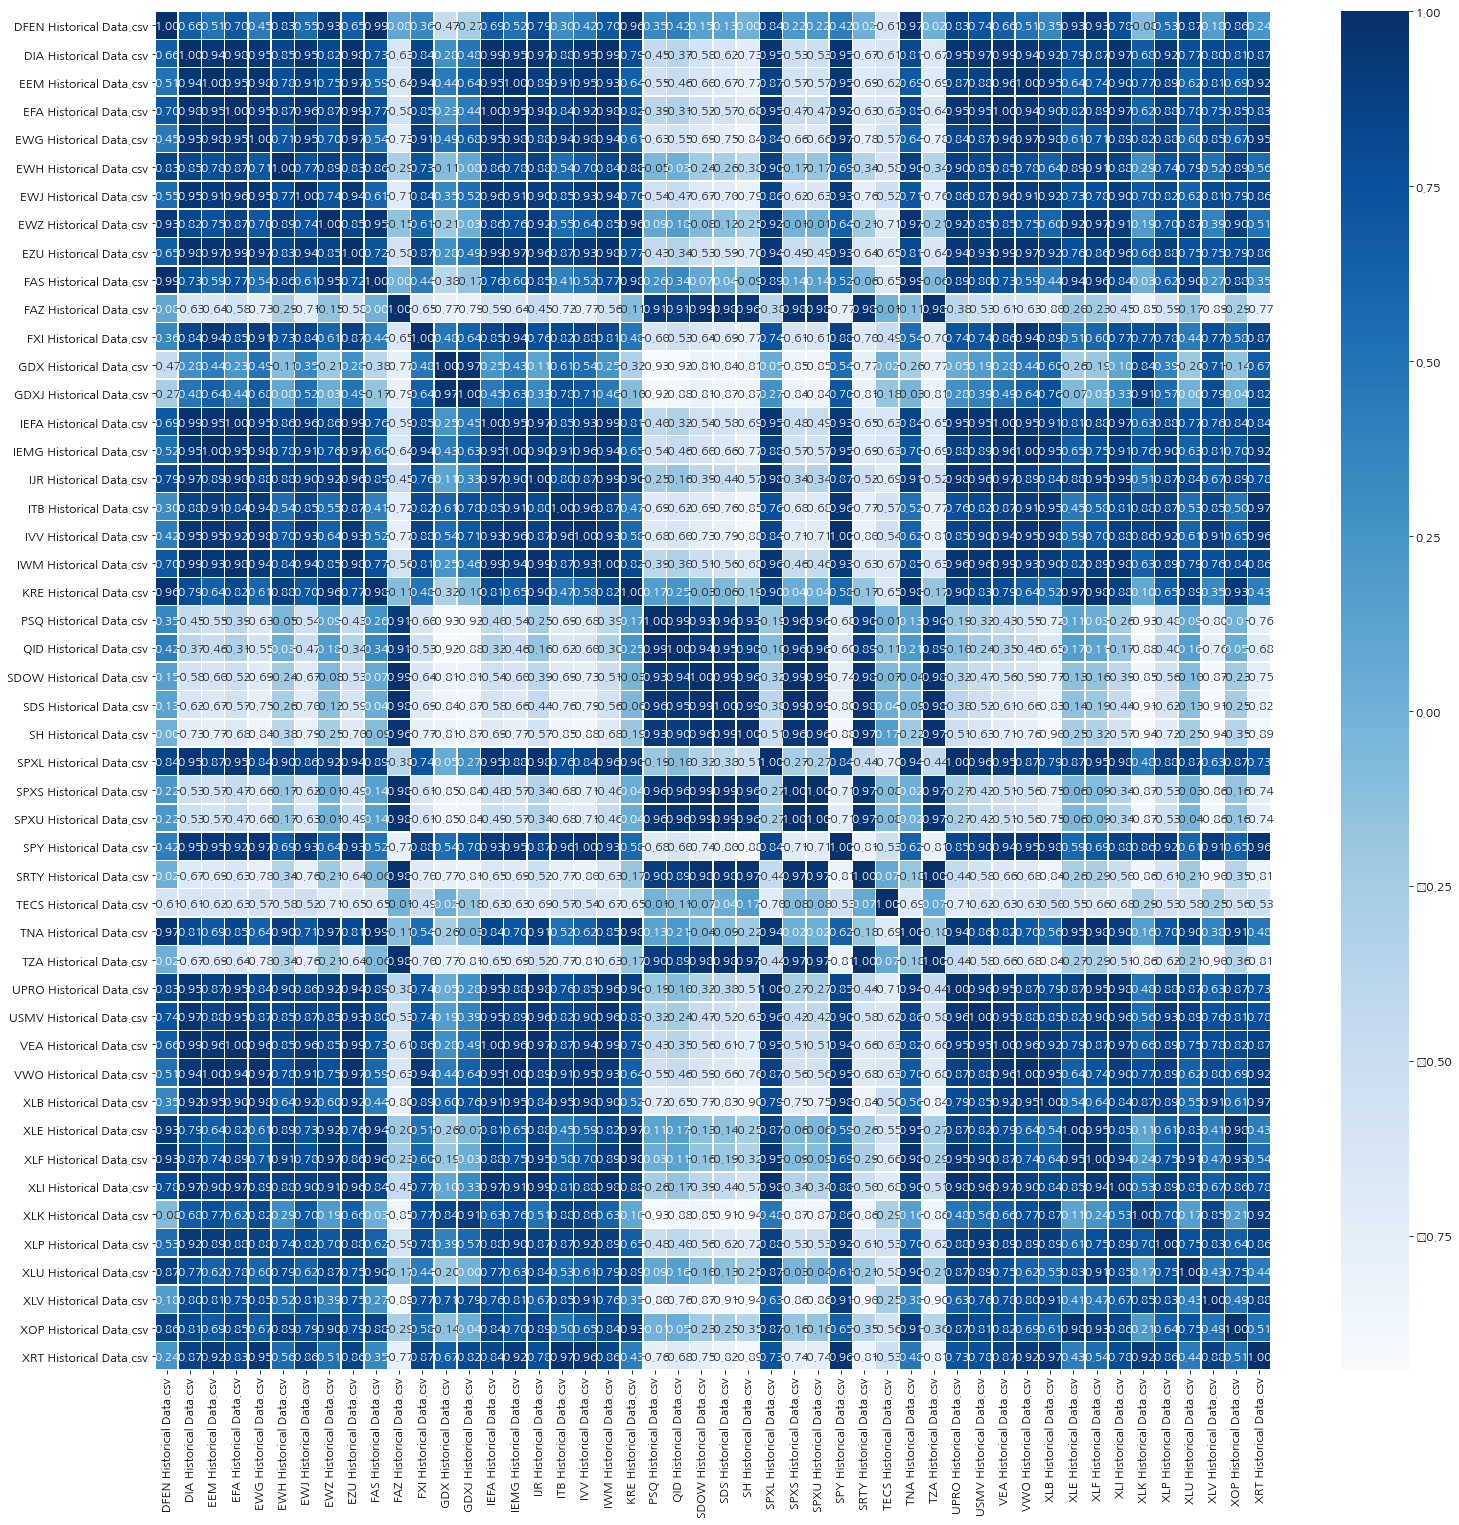

In [23]:
# 일반적인 히트맵 그리기
plt.figure(figsize=(25,25))
sns.heatmap(data, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

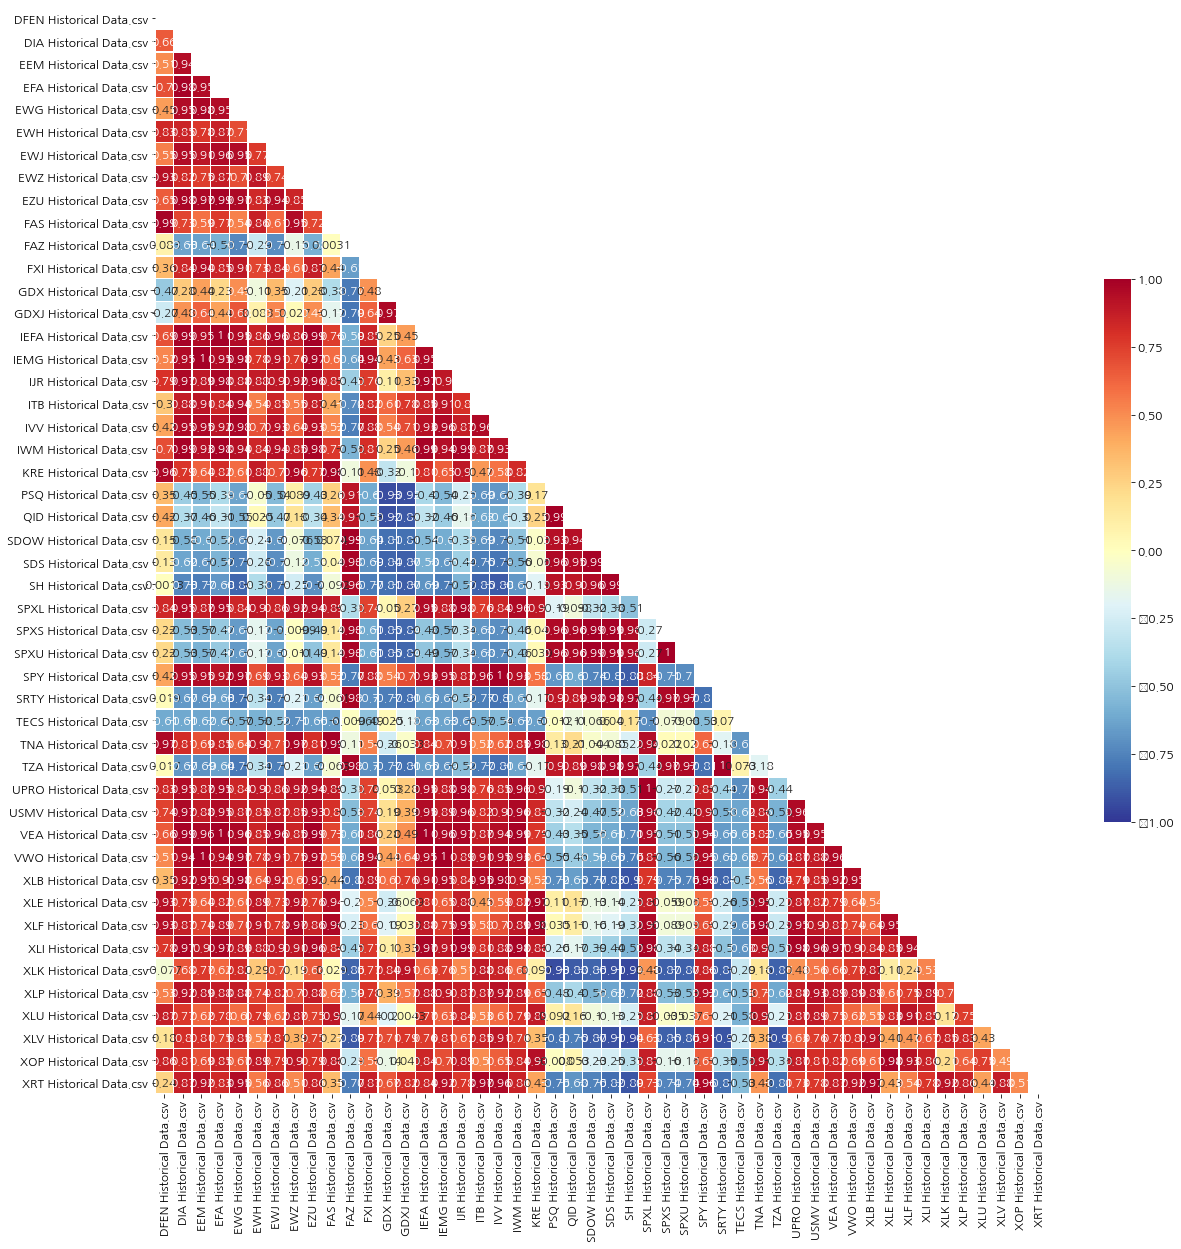

In [24]:
# 좀 더 예쁜 히트맵 그리기
fig, ax = plt.subplots( figsize=(20,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(data, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

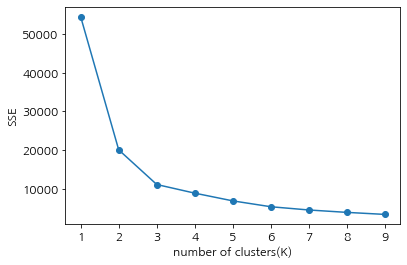

In [25]:
# 군집분석을 위해 몇 개의 군집으로 나눌 지 계산한다.
# 약 4가 엘보 포인트라 가정하고 4로 나눈다.
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters(K)')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [26]:
# 군집분석 진행, 파라미터는 일단 야매로 간단하게 넣기
model = KMeans(n_clusters=3, init="random", n_init=1,
               max_iter=1000, random_state=1).fit(df2)

In [27]:
# 모델이 잘 학습되었나 확인
model

KMeans(init='random', max_iter=1000, n_clusters=3, n_init=1, random_state=1)

In [28]:
# 군집이 180개의 차원을 가지고 있음
# 2차원 그래프에 나타내려면 2개 차원으로 줄여야 함
# 차원축소는 결과는 예쁘게 나오지만, 알아먹기가 힘듦(차원들이 합성되므로)
# 임의의 새로운 차원을 만들고 표시하기로 함

clusters = df2.copy()

# 차원 1, 6개월간 평균 가격
clusters['Mean'] = clusters.mean(axis=1)

# 차원 2, 어제와 오늘의 변동량을 구하고 이것의 전체평균
# 0.01 등으로 수치가 작게 나오므로 보기 편하게 100 곱해준다.
clusters['Gap_Mean'] = abs(clusters.diff(axis=1).mean(axis=1))*100

In [29]:
# 오른쪽 맨 끝에 Mean, Gap_Mean이 예쁘게 들어갔나 확인
clusters

Date,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,...,2020-08-23 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00,2020-08-30 00:00:00,2020-08-31 00:00:00,Mean,Gap_Mean
DFEN Historical Data.csv,8.383854,8.750952,8.918507,8.961158,8.961158,8.993145,8.903275,8.792079,8.853008,8.936786,...,0.790556,0.964204,0.988576,0.884996,0.993145,0.961158,0.953542,0.952018,2.814350,3.060167
DIA Historical Data.csv,9.308302,9.163084,9.155441,9.132512,9.312124,9.423904,9.443011,9.351295,9.486004,9.557657,...,8.415974,8.787618,8.873603,8.827744,9.100029,9.195567,9.123913,9.086653,6.770447,1.394426
EEM Historical Data.csv,9.643799,9.300792,9.043536,9.063325,9.327177,9.445910,9.637203,10.000000,9.835092,9.736148,...,8.654354,9.102902,9.300792,9.379947,9.426121,9.498681,9.492084,8.918206,6.343508,1.813347
EFA Historical Data.csv,9.888746,9.691913,9.636286,9.623449,9.709029,9.713308,9.726145,9.756098,9.820282,9.816003,...,7.432606,7.851947,7.950364,8.005991,8.001712,7.899016,7.886179,7.903295,6.336385,1.951847
EWG Historical Data.csv,9.478827,9.128664,9.063518,9.071661,9.283388,9.446254,9.486971,9.438111,9.454397,9.405537,...,9.136808,9.641694,9.837134,10.000000,9.967427,9.796417,9.788274,9.910423,6.939632,1.395162
EWH Historical Data.csv,9.016620,8.822715,8.628809,8.656510,8.795014,9.127424,9.279778,9.764543,9.778393,9.667590,...,5.332410,5.927978,6.038781,5.941828,5.706371,6.260388,6.218837,6.052632,5.014307,2.199073
EWJ Historical Data.csv,9.929802,9.725590,9.604340,9.802170,9.795788,9.936184,9.859604,9.878749,9.923421,9.776643,...,8.430121,8.851308,8.895980,8.947033,8.832163,8.749202,8.742821,8.825782,6.778649,1.731403
EWZ Historical Data.csv,10.000000,9.921348,9.741573,9.606742,9.655431,9.445693,9.558052,9.374532,9.404494,9.232210,...,2.947566,3.071161,3.176030,3.183521,3.011236,3.411985,3.411985,3.209738,3.973268,3.311391
EZU Historical Data.csv,10.000000,9.745061,9.700446,9.630338,9.751434,9.770554,9.783301,9.783301,9.776928,9.764181,...,7.711918,8.234544,8.444869,8.508604,8.514978,8.374761,8.368388,8.374761,6.370895,1.994014
FAS Historical Data.csv,8.691486,8.604472,8.514154,8.473400,8.650732,8.744355,8.774094,8.897456,8.962441,8.887543,...,2.097147,2.305320,2.391233,2.358189,2.560855,2.612623,2.599405,2.588391,3.423817,2.894324


In [30]:
# 분석결과 0,1,2,3로 나눠진 군집을 각각 나눠준다.

# 0번 군집(A)
cluster1 = clusters[model.labels_ == 0]
# 1번 군집(B)
cluster2 = clusters[model.labels_ == 1]
# 2번 군집(C)
cluster3 = clusters[model.labels_ == 2]
# 3번 군집(D)
# cluster4 = clusters[model.labels_ == 3]

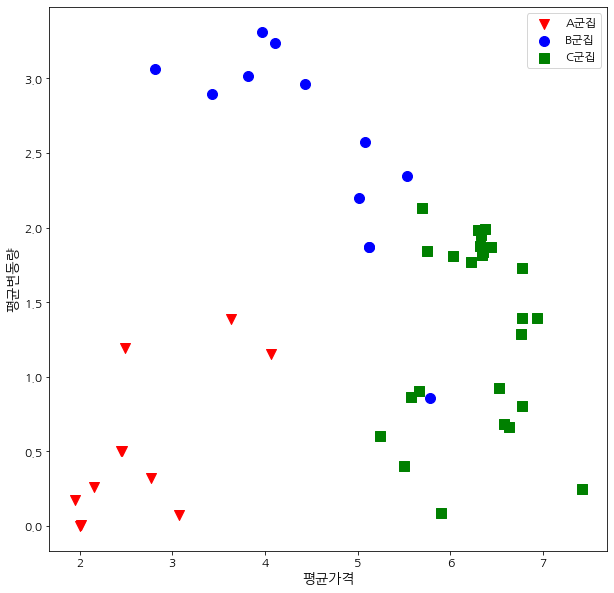

In [31]:
# 산점도 그려서 내가 정한 기준(평균 가격, 평균 변동)이 군집을 잘 구분하는지 시각적으로 확인

plt.figure(figsize=(10,10))
plt.scatter(cluster1['Mean'],cluster1['Gap_Mean'], s=100, marker='v', c='r', label = 'A군집')
plt.scatter(cluster2['Mean'],cluster2['Gap_Mean'], s=100, marker='o', c='b', label = 'B군집')
plt.scatter(cluster3['Mean'],cluster3['Gap_Mean'], s=100, marker='s', c='g', label = 'C군집')
# plt.scatter(cluster4['Mean'],cluster4['Gap_Mean'], s=100, marker='x', c='y', label = 'D군집')

plt.xlabel('평균가격', fontsize=14)
plt.ylabel('평균변동량', fontsize=14)

plt.legend()

# B 군집이 좀 지저분하지만, 그래도 적당히 나눠져서 보인다고 판단.
plt.show()

In [32]:
# 그래프 그리기 위해서 각 군집별 일일 평균 구함.
group0_graph = df2[model.labels_ == 0].transpose()
group0_graph['avg'] = group0_graph.mean(axis=1)
group1_graph = df2[model.labels_ == 1].transpose()
group1_graph['avg'] = group1_graph.mean(axis=1)
group2_graph = df2[model.labels_ == 2].transpose()
group2_graph['avg'] = group2_graph.mean(axis=1)
# group3_graph = df2[model.labels_ == 3].transpose()
# group3_graph['avg'] = group3_graph.mean(axis=1)

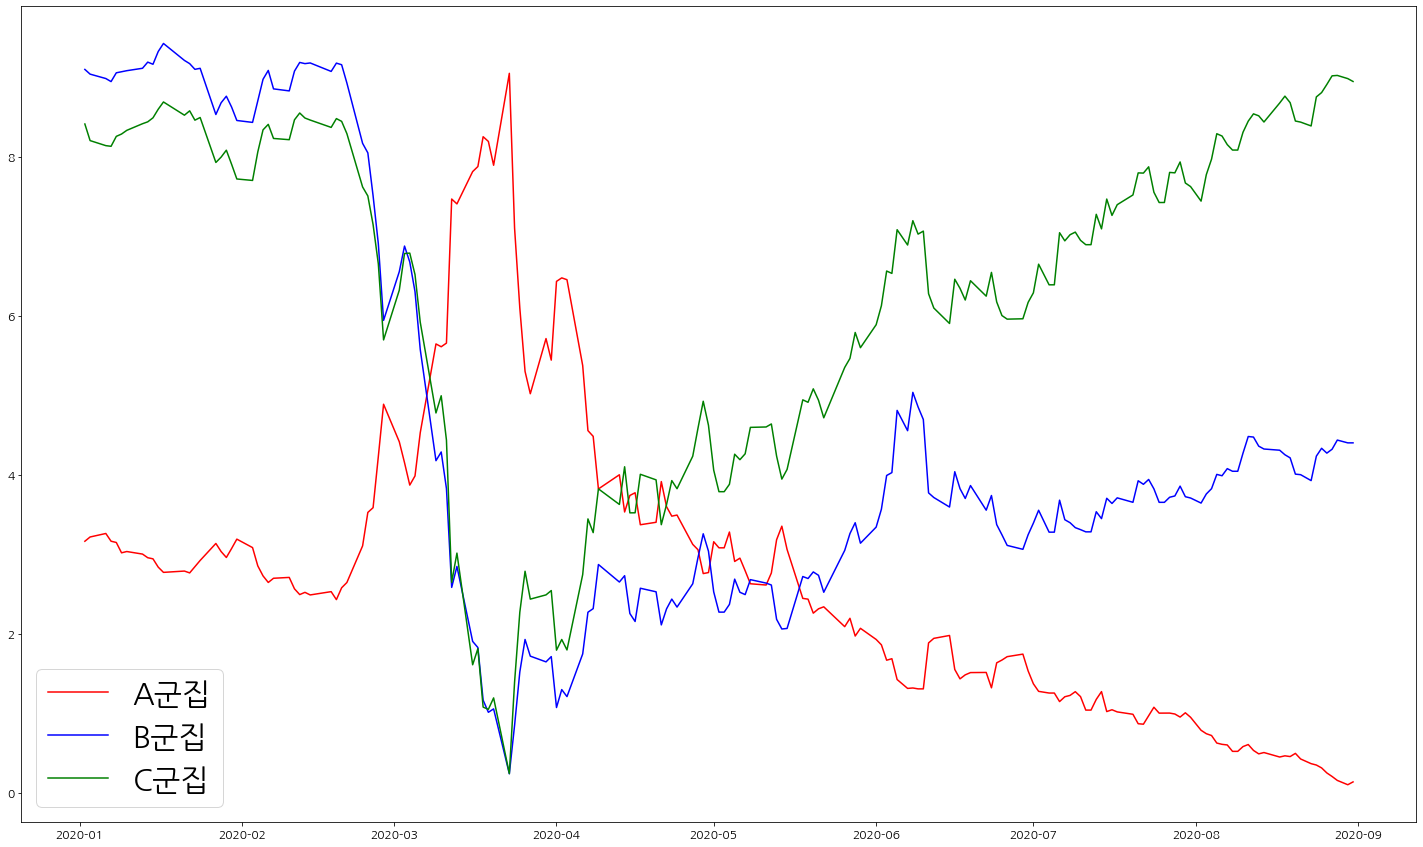

In [33]:
# 군집별로 구한 평균 그래프로 그리기
plt.figure(figsize=(25,15))
plt.plot(group0_graph['avg'], c='r', label = 'A군집')
plt.plot(group1_graph['avg'], c='b', label = 'B군집')
plt.plot(group2_graph['avg'], c='g', label = 'C군집')
# plt.plot(group3_graph['avg'], c='y', label = 'D군집')
plt.legend(prop={'size': 30})

# 그래프 그리기

In [34]:
# 2가지 방법이 있음
# 1. (0,1)로 스케일링 된 주가를 다시 역스케일링하여 그래프 그리기 (inverse.transefrom)

# 2. 그냥 스케일링 하기 전의 자료를 가져와서 그리기

# 1번은 각 종목별로 10을 곱하고 이런저런 전처리(Drop 등)를 해서 섞였기 때문에 불가능(거꾸로 되돌려야 해서 어려움)
# 2번, 이전 자료를 가져다가 그래프 그리기

In [35]:
# 각 클러스터 준비하기

df_cluster1 = pd.DataFrame()
df_cluster2 = pd.DataFrame()
df_cluster3 = pd.DataFrame()
# df_cluster4 = pd.DataFrame()

In [36]:
# merge 함수를 쓰기 위해 기준 칼럼 생성

df_cluster1['Date'] = etfs_mod[0]['Date']
df_cluster2['Date'] = etfs_mod[0]['Date']
df_cluster3['Date'] = etfs_mod[0]['Date']
# df_cluster4['Date'] = etfs_mod[0]['Date']

In [37]:
# 각 df_cluster로 해당하는 ETF들 모아서 넣는 함수


for i in range(0,len(file_list)):
    if etfs_mod[i].columns[1] in cluster1.index:
        df_cluster1 = pd.merge(df_cluster1, etfs_mod[i])
    if etfs_mod[i].columns[1] in cluster2.index:
        df_cluster2 = pd.merge(df_cluster2, etfs_mod[i])
    if etfs_mod[i].columns[1] in cluster3.index:
        df_cluster3 = pd.merge(df_cluster3, etfs_mod[i])
    # if etfs_mod[i].columns[1] in cluster4.index:
        # df_cluster4 = pd.merge(df_cluster4, etfs_mod[i])

In [38]:
# 기타 간단한 처리 및 마무리

df_cluster1.set_index("Date", inplace=True)
df_cluster2.set_index("Date", inplace=True)
df_cluster3.set_index("Date", inplace=True)
# df_cluster4.set_index("Date", inplace=True)

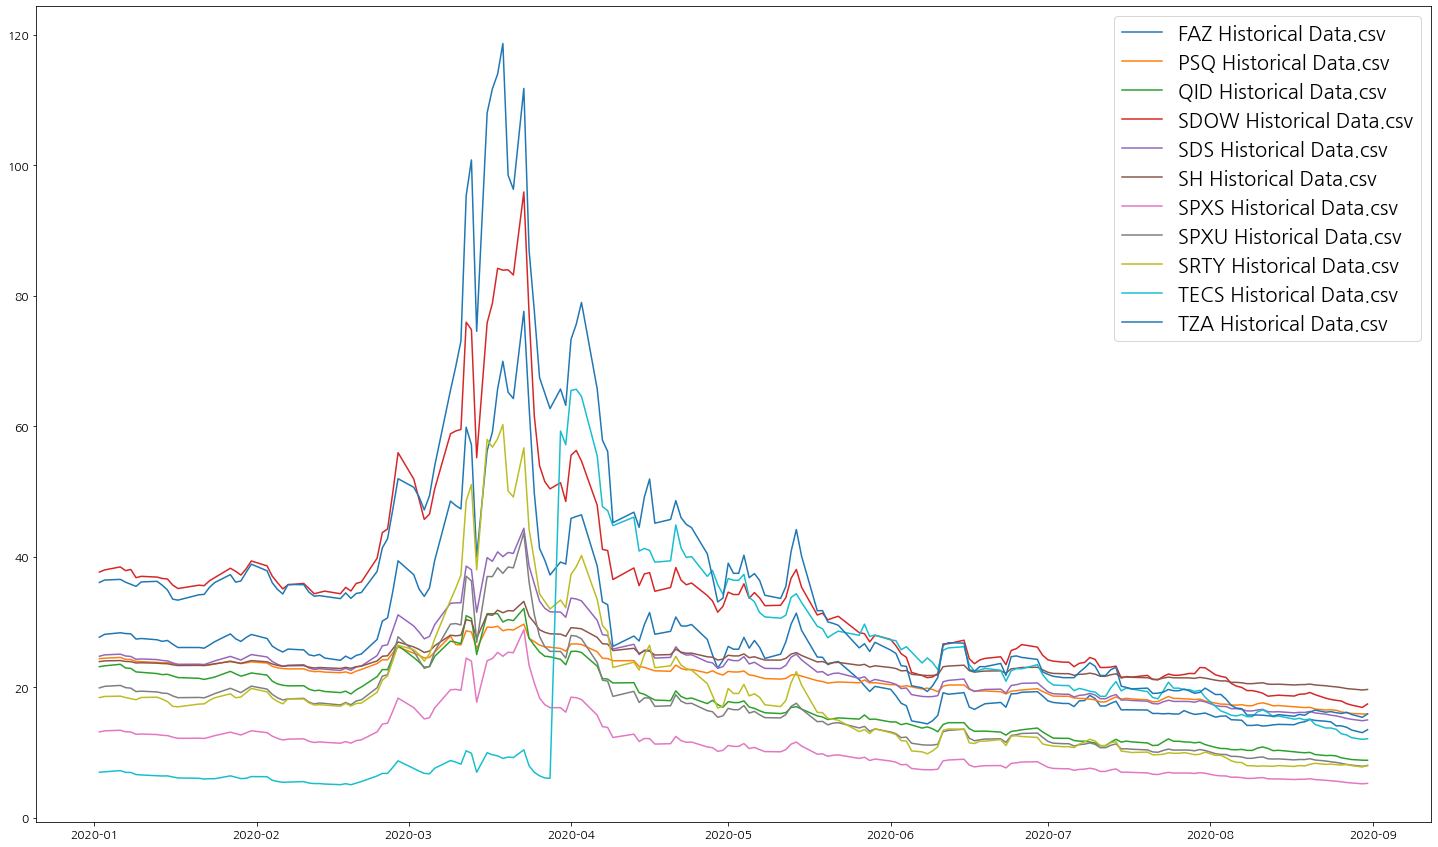

In [39]:
# A 군집

plt.figure(figsize=(25,15))
for i in range(0,len(df_cluster1.columns)):
    plt.plot(df_cluster1.iloc[:,i], label = df_cluster1.columns[i])

plt.legend(prop={'size': 20})
plt.show()

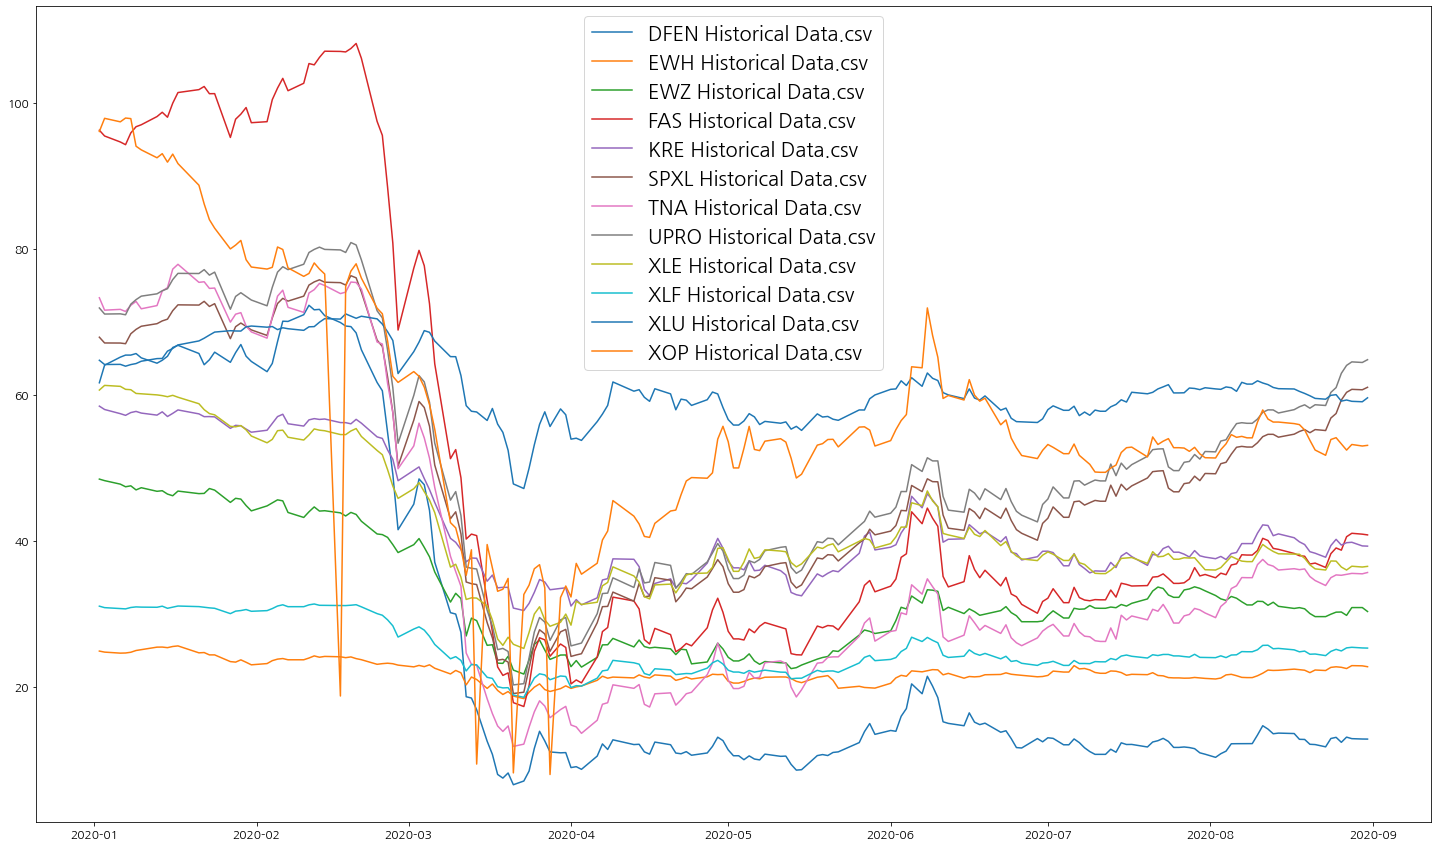

In [40]:
# B 군집

plt.figure(figsize=(25,15))
for i in range(0,len(df_cluster2.columns)):
    plt.plot(df_cluster2.iloc[:,i], label = df_cluster2.columns[i])

plt.legend(prop={'size': 20})
plt.show()

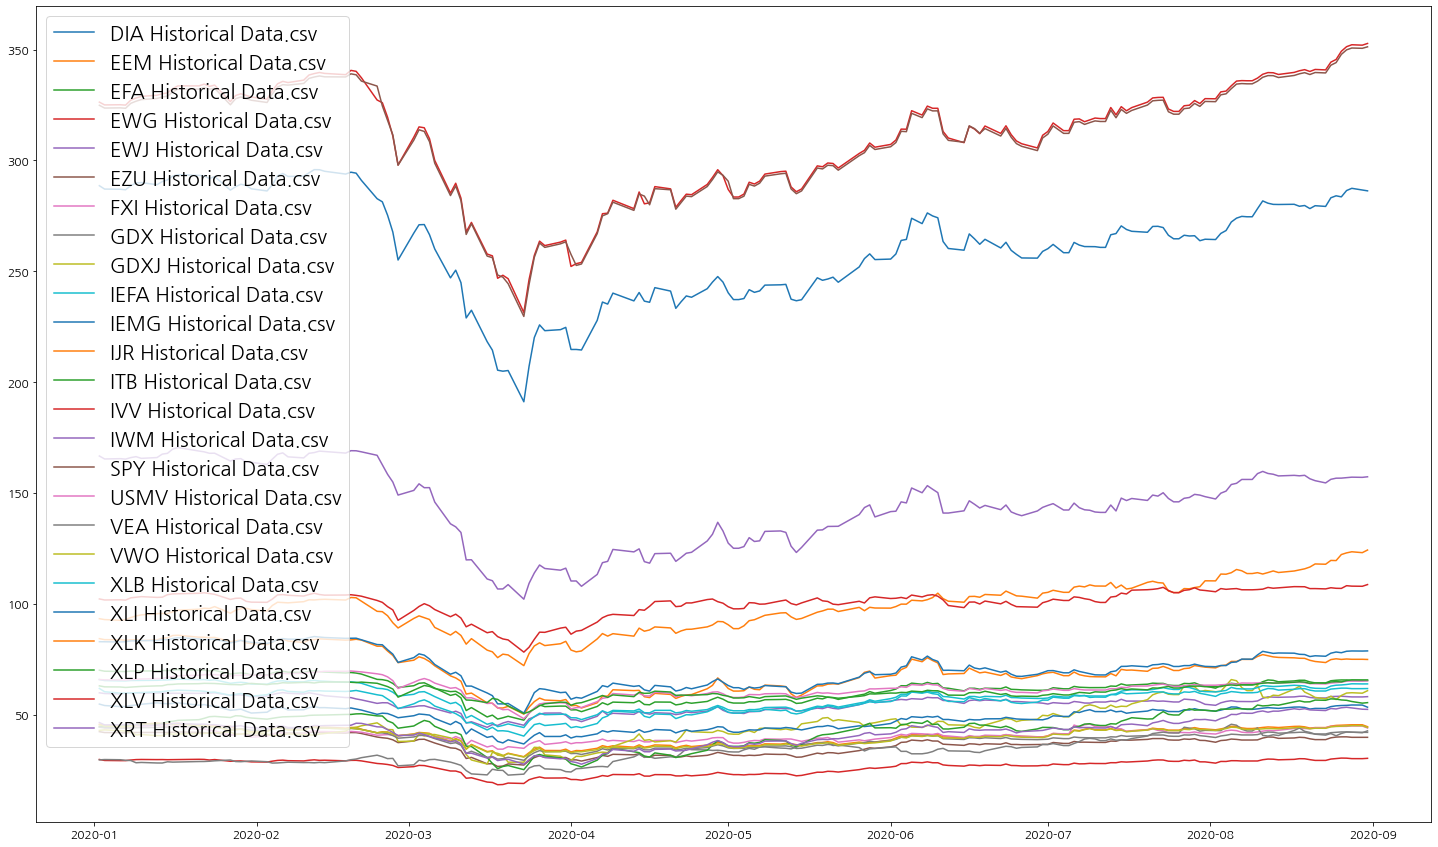

In [41]:
# C 군집

plt.figure(figsize=(25,15))
for i in range(0,len(df_cluster3.columns)):
    plt.plot(df_cluster3.iloc[:,i], label = df_cluster3.columns[i])

plt.legend(prop={'size': 20})
plt.show()

In [42]:
# 지금은 없어진 D 군집

#plt.figure(figsize=(25,15))
#for i in range(0,len(df_cluster4.columns)):
#    plt.plot(df_cluster4.iloc[:,i], label = df_cluster4.columns[i])

#plt.legend(prop={'size': 20})
#plt.show()

In [43]:
updown = pd.DataFrame()
updown2 = pd.DataFrame()
updown3 = pd.DataFrame()


for i in range(0, len(df_cluster1.columns)):
    cls = df_cluster1
    temp1 = cls[cls.columns[i]].max()/cls[cls.columns[i]].min()
    temp2 = cls.columns[i]
    updown = updown.append(pd.Series(temp1), ignore_index= True)
    
for i in range(0, len(df_cluster2.columns)):
    cls = df_cluster2
    temp1 = cls[cls.columns[i]].max()/cls[cls.columns[i]].min()
    temp2 = cls.columns[i]
    updown2 = updown2.append(pd.Series(temp1), ignore_index= True)


for i in range(0, len(df_cluster3.columns)):
    cls = df_cluster3
    temp1 = cls[cls.columns[i]].max()/cls[cls.columns[i]].min()
    temp2 = cls.columns[i]
    updown3 = updown3.append(pd.Series(temp1), ignore_index= True)
    
updown.set_index(df_cluster1.columns, inplace=True)
updown2.set_index(df_cluster2.columns, inplace=True)
updown3.set_index(df_cluster3.columns, inplace=True)

In [46]:
updown3

,0
DIA Historical Data.csv,1.547437
EEM Historical Data.csv,1.486521
EFA Historical Data.csv,1.478480
EWG Historical Data.csv,1.649379
EWJ Historical Data.csv,1.352928
EZU Historical Data.csv,1.586542
FXI Historical Data.csv,1.328125
GDX Historical Data.csv,2.003501
GDXJ Historical Data.csv,2.367684
IEFA Historical Data.csv,1.492551
